Langgraph workflow:
1. initialize model and tools
2. initialize graphs with state
3. define graph nodes
4. define entry points and edges
5. compile the graph
6. exec the graph

node = fundamental unit of exec

## setup

In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os

os.environ["LANGCHAIN_PROJECT"] = "LangGraph Tutorial"

In [3]:
import jupyter_black

jupyter_black.load()

In [4]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages

## 104. Simple LangGraph
https://drive.google.com/file/d/1bJ7p5TSFCv2lWAv-ZtFPOrRoOpj3Lw2h/view?usp=drive_link

In [4]:
class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)

In [6]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o")


def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.
graph_builder.add_node("chatbot", chatbot)

In [7]:
graph_builder.set_entry_point("chatbot")

In [8]:
graph_builder.set_finish_point("chatbot")

In [9]:
graph = graph_builder.compile()

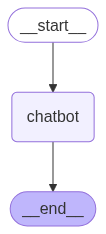

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [12]:
while True:
    user_input = input("User: ")
    if user_input.lower() in ["quit", "exit", "q"]:
        print("Goodbye!")
        break
    for event in graph.stream({"messages": ("user", user_input)}):
        print(event["chatbot"]["messages"])
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)

User:  why is the sky blue?


[AIMessage(content="The sky appears blue primarily due to a phenomenon called Rayleigh scattering. When sunlight enters Earth's atmosphere, it collides with molecules and small particles in the air. Sunlight consists of different colors, each with its wavelength. Blue light waves are shorter and scatter more than the other colors when they strike the gas molecules in the atmosphere. This scattering causes the blue light to spread in all directions and become more visible, making the sky appear blue to our eyes.\n\nDuring sunrise or sunset, the sky can appear red or orange because the sun is lower in the sky, and its light passes through a thicker layer of the atmosphere. In this case, the shorter blue wavelengths are scattered out of the line of sight, and the longer red wavelengths dominate.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 148, 'prompt_tokens': 13, 'total_tokens': 161, 'completion_tokens_details': {'accepted_prediction_tok

User:  why is the grass green?


[AIMessage(content="The grass appears green primarily due to the presence of chlorophyll, a pigment found in the chloroplasts of plant cells. Chlorophyll is essential for photosynthesis, the process by which plants convert light energy from the sun into chemical energy. Chlorophyll absorbs light most efficiently in the blue and red wavelengths, but it reflects and transmits the green wavelengths, which is why grass looks green to our eyes. Additionally, chlorophyll plays a crucial role in capturing light energy and facilitating the synthesis of carbohydrates, which fuel the plant's growth and metabolic functions.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 110, 'prompt_tokens': 13, 'total_tokens': 123, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-0

User:  Summarize what did I asked you during this session.


[AIMessage(content="I'm sorry, but as an AI language model, I don't have the ability to retain or recall information from previous interactions. Each session is independent, and I don't store any personal data or conversation history. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 47, 'prompt_tokens': 19, 'total_tokens': 66, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CANdLaCCXiCkWWp9fX8CoNPERBjzV', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--4024b916-f550-41f5-a1d8-a1240debe4ea-0', usage_metadata={'input_tokens': 19, 'output_tokens': 47, 'total_tokens': 66, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_det

User:  q


Goodbye!


In [13]:
graph.invoke('hi')

InvalidUpdateError: Expected dict, got hi
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/INVALID_GRAPH_NODE_RETURN_VALUE

In [14]:
from langchain_core.messages import HumanMessage

graph.invoke({"messages": [HumanMessage(content="Hey, how are you?")]})

{'messages': [HumanMessage(content='Hey, how are you?', additional_kwargs={}, response_metadata={}, id='8f049b8d-63e4-4c55-949f-08e140e010fa'),
  AIMessage(content="Hello! I'm just a program, so I don't have feelings, but I'm here and ready to help you. How can I assist you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 29, 'prompt_tokens': 13, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-CAORtKUV6Brs933oHu7Z2yB9O05yk', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--b763fa64-ff4f-479a-93ad-5607b653ac0b-0', usage_metadata={'input_tokens': 13, 'output_tokens': 29, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}

## 105. Tool Usage and Persistence
* https://drive.google.com/file/d/113yjenUddxEMnHX6Ud3aqSF5jf7ee4x2/view?usp=drive_link
* https://www.tavily.com/

### tool usage
```sh
pip install tavily-python
```

In [16]:
assert {"TAVILY_API_KEY"} <= set(os.environ)

In [17]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

/var/folders/02/m1j4q6jj79zbjw0qtxcldpnc0000gn/T/ipykernel_5566/3979812345.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=2)


[{'title': 'What is LangGraph? - IBM',
  'url': 'https://www.ibm.com/think/topics/langgraph',
  'content': 'Nodes: In LangGraph, nodes represent individual components or agents within an AI workflow. Nodes can be thought of as “actors” that interact with each other in a specific way. For example, to add nodes for tool calling, one can use the ToolNode. Another example, the next node, refers to the node that will be executed following the current one.',
  'score': 0.9263638},
 {'title': "Introduction to LangGraph: A Beginner's Guide - Medium",
  'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Stateful Graph: LangGraph revolves around the concept of a stateful graph, where each node in the graph represents a step in your computation, and the graph maintains a state that is passed around and updated as the computation progresses.\n Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computa

In [18]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

llm = ChatOpenAI(model="gpt-4o")

# Modification: tell the LLM which tools it can call
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

In [19]:
## note: can be replaced with pre-built `ToolNode`
import json

from langchain_core.messages import ToolMessage


class BasicToolNode:
    """A node that runs the tools requested in the last AIMessage."""

    def __init__(self, tools: list) -> None:
        self.tools_by_name = {tool.name: tool for tool in tools}

    def __call__(self, inputs: dict):
        if messages := inputs.get("messages", []):
            message = messages[-1]
        else:
            raise ValueError("No message found in input")
        outputs = []
        for tool_call in message.tool_calls:
            tool_result = self.tools_by_name[tool_call["name"]].invoke(
                tool_call["args"]
            )
            outputs.append(
                ToolMessage(
                    content=json.dumps(tool_result),
                    name=tool_call["name"],
                    tool_call_id=tool_call["id"],
                )
            )
        return {"messages": outputs}


tool_node = BasicToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

In [20]:
from typing import Literal


def route_tools(
    state: State,
) -> Literal["tools", "__end__"]:
    """
    Use in the conditional_edge to route to the ToolNode if the last message
    has tool calls. Otherwise, route to the end.
    """
    if isinstance(state, list):
        ai_message = state[-1]
    elif messages := state.get("messages", []):
        ai_message = messages[-1]
    else:
        raise ValueError(f"No messages found in input state to tool_edge: {state}")
    if hasattr(ai_message, "tool_calls") and len(ai_message.tool_calls) > 0:
        return "tools"
    return "__end__"


# The `tools_condition` function returns "tools" if the chatbot asks to use a tool, and "__end__" if
# it is fine directly responding. This conditional routing defines the main agent loop.
graph_builder.add_conditional_edges(
    "chatbot",
    route_tools,
    # The following dictionary lets you tell the graph to interpret the condition's outputs as a specific node
    # It defaults to the identity function, but if you
    # want to use a node named something else apart from "tools",
    # You can update the value of the dictionary to something else
    # e.g., "tools": "my_tools"
    {"tools": "tools", "__end__": "__end__"},
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")
graph = graph_builder.compile()

You've hit on a crucial point, and your confusion is completely understandable. For the simple task of calling a single tool, LangGraph absolutely looks like overkill.

You're not missing anything in your observation; you're just seeing the difference between a simple, pre-built tool and a powerful, low-level framework.

Think of it like this:

* **`AgentExecutor` is like buying a pre-built, factory-made car.** It’s easy to use, works great for standard driving, and gets you from point A to B reliably. 🚗
* **`LangGraph` is like being given a high-performance engine, chassis, wheels, and a toolbox.** You have to assemble the car yourself, which is more work. But you can build a Formula 1 racer, a monster truck, or a multi-person vehicle—whatever you can imagine. 🏎️🛠️

The complexity of LangGraph is the price of **ultimate control and flexibility**.

---
#### ## Key Benefits LangGraph Provides (That `AgentExecutor` Doesn't)

The "obvious benefits" you were looking for only appear when your agent's logic needs to be more complex than the simple `Think -> Act -> Observe -> Think` loop that `AgentExecutor` forces you into.

##### **1. Full Control Over the "Loop"**

* **`AgentExecutor` has a fixed, hidden loop.** The agent calls an LLM, the LLM decides to use a tool, the tool is run, and the result is fed back to the LLM. You can't easily change this sequence.
* **`LangGraph` makes you define the loop explicitly using nodes and edges.** This is its superpower. It means you can create any logic you want, such as:
    * **Cycles:** Go back to a previous step if the result isn't good enough.
    * **Human-in-the-Loop:** Add a node that pauses the process and waits for a human to approve the LLM's plan before executing a costly tool.
    * **Multi-Agent Workflows:** Have one "Planner" agent create a task list, and then route tasks to multiple "Worker" agents that can run in parallel.
    * **Conditional Logic:** If a tool fails, route to a "Fallback" node. If the user's query is ambiguous, route to a "Clarification" node that asks the user a question.

##### **2. Explicit State Management**

* **`AgentExecutor` manages state internally** in the `agent_scratchpad`. This works, but it's like a black box.
* **`LangGraph` forces you to define an explicit `State` object** (the `TypedDict` in your code). This seems like extra work, but it's a massive advantage for complex tasks. You have complete control over the agent's "memory." At any node, you can read from, add to, or modify the state with precision.

##### **3. Enhanced Debugging and Visibility**

* Because `AgentExecutor` is a high-level abstraction, it can sometimes be difficult to pinpoint exactly where things went wrong inside its internal loop.
* With `LangGraph`, every step (**node**) and every transition (**edge**) is a piece of code you wrote. This makes it far easier to trace the flow of data and debug complex interactions. When you visualize a LangGraph (especially with LangSmith), you see *your* custom logic, not a generic loop.

---
###### ## When to Use Which

Your Udemy course is likely starting with `AgentExecutor` because it's the fastest way to understand the basics. Then it introduces `LangGraph` for more advanced, real-world applications.

* **Use `AgentExecutor` for:**
    * **Prototyping:** Quickly building standard agents that follow the simple `(LLM -> Tool)` pattern.
    * **Simple Tool Use:** When all you need is for an LLM to reliably call one or more tools and return a final answer.

* **Use `LangGraph` for:**
    * **Complex Control Flow:** Anything that isn't a straight line (e.g., requires cycles, branching, or retries).
    * **Human-in-the-Loop:** When a person needs to be part of the decision-making process.
    * **Multi-Agent Systems:** When you need to orchestrate collaboration between multiple different chains or agents.
    * **Production Applications:** When you need the reliability, state control, and debuggability required for a robust, long-running agent.

So, for your example, `AgentExecutor` is simpler and better. But if you wanted to ask, "How many letters are in the word 'data', and if the answer is less than 5, search for a new word and try again," you would immediately need the cyclic power of **LangGraph**.

### adding memory

```sh
pip install langgraph-checkpoint-sqlite
```

In [24]:
from langgraph.checkpoint.sqlite import SqliteSaver

memory = SqliteSaver.from_conn_string(":memory:")

In [25]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
# Any time a tool is called, we return to the chatbot to decide the next step
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

In [26]:
graph = graph_builder.compile(checkpointer=memory)

In [27]:
config = {"configurable": {"thread_id": "1"}}

In [29]:
user_input = "Hi there! My name is Alex Leontiev!"

# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    print(event)
    event["messages"][-1].pretty_print()

AttributeError: '_GeneratorContextManager' object has no attribute 'get_next_version'

In [31]:
graph.invoke(
    # {'messages':[('human','How are you?')]}
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)

AttributeError: '_GeneratorContextManager' object has no attribute 'get_next_version'

In [34]:
# from langgraph_sqlite import SqliteSaver
from langgraph.checkpoint.sqlite import SqliteSaver

# memory = SqliteSaver.from_conn_string(":memory:")

# Use a 'with' statement to properly manage the memory connection
with SqliteSaver.from_conn_string(":memory:") as memory:
    # 1. Compile the graph with the checkpointer INSIDE the 'with' block
    graph = graph_builder.compile(checkpointer=memory)

    # 2. Define a configuration for a specific conversation thread
    config = {"configurable": {"thread_id": "1"}}

    # 3. Interact with the graph INSIDE the 'with' block
    print("--- First interaction ---")
    user_input = "Hi there! My name is Alex Leontiev!"
    response = graph.invoke({"messages": [("user", user_input)]}, config)
    # Pretty-print the final response
    response["messages"][-1].pretty_print()

    print("\n--- Second interaction (testing memory) ---")
    user_input_2 = "What did I say my name was?"
    response_2 = graph.invoke({"messages": [("user", user_input_2)]}, config)
    response_2["messages"][-1].pretty_print()

--- First interaction ---
================================== Ai Message ==================================

Hello Alex Leontiev! How can I assist you today?

--- Second interaction (testing memory) ---
================================== Ai Message ==================================

You mentioned that your name is Alex Leontiev.


## 106. Human in the loop
* https://colab.research.google.com/drive/113yjenUddxEMnHX6Ud3aqSF5jf7ee4x2#scrollTo=dba1b168-f8e0-496d-9bd6-37198fb4776e

In [15]:
from typing import Annotated

# from langchain_anthropic import ChatAnthropic
from langchain_openai import ChatOpenAI

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

memory = SqliteSaver.from_conn_string(":memory:")


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
# llm = ChatAnthropic(model="claude-3-haiku-20240307")
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

In [23]:
# from langgraph_sqlite import SqliteSaver
from langgraph.checkpoint.sqlite import SqliteSaver

# memory = SqliteSaver.from_conn_string(":memory:")

# Use a 'with' statement to properly manage the memory connection
with SqliteSaver.from_conn_string(":memory:") as memory:
    # 1. Compile the graph with the checkpointer INSIDE the 'with' block
    graph = graph_builder.compile(
        checkpointer=memory,
        # This is new!
        interrupt_before=["tools"],
    )

    # 2. Define a configuration for a specific conversation thread
    config = {"configurable": {"thread_id": "1"}}

    # 3. Interact with the graph INSIDE the 'with' block
    messages = [
        """I'm learning LangGraph. Could you do some research on it for me?"""
        # "Hi there! My name is Alex Leontiev!",
        # "What did I say my name was?",
    ]
    for i, user_input in enumerate(messages):
        print(f"--- interaction #{i+1} ---")
        # user_input =
        response = graph.invoke({"messages": [("user", user_input)]}, config)
        # Pretty-print the final response
        response["messages"][-1].pretty_print()

    # print("\n--- Second interaction (testing memory) ---")
    # user_input_2 =
    # response_2 = graph.invoke({"messages": [("user", user_input_2)]}, config)
    # response_2["messages"][-1].pretty_print()

    snapshot = graph.get_state(config)
    print(snapshot.next)

    existing_message = snapshot.values["messages"][-1]
    print(existing_message.tool_calls)

    ## allow continuation

--- interaction #1 ---
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_ELU44JJPnQB2Cxz0eh8LnCs8)
 Call ID: call_ELU44JJPnQB2Cxz0eh8LnCs8
  Args:
    query: LangGraph programming language
('tools',)
[{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph programming language'}, 'id': 'call_ELU44JJPnQB2Cxz0eh8LnCs8', 'type': 'tool_call'}]


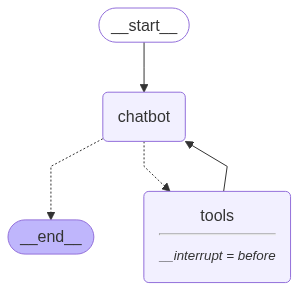

In [24]:
graph

In [25]:
# from langgraph_sqlite import SqliteSaver
from langgraph.checkpoint.sqlite import SqliteSaver

# memory = SqliteSaver.from_conn_string(":memory:")

# Use a 'with' statement to properly manage the memory connection
with SqliteSaver.from_conn_string(":memory:") as memory:
    # 1. Compile the graph with the checkpointer INSIDE the 'with' block
    graph = graph_builder.compile(
        checkpointer=memory,
        # This is new!
        interrupt_before=["tools"],
    )

    # 2. Define a configuration for a specific conversation thread
    config = {"configurable": {"thread_id": "1"}}

    # 3. Interact with the graph INSIDE the 'with' block
    messages = [
        """I'm learning LangGraph. Could you do some research on it for me?"""
        # "Hi there! My name is Alex Leontiev!",
        # "What did I say my name was?",
    ]
    for i, user_input in enumerate(messages):
        print(f"--- interaction #{i+1} ---")
        # user_input =
        response = graph.invoke({"messages": [("user", user_input)]}, config)
        # Pretty-print the final response
        response["messages"][-1].pretty_print()

    # print("\n--- Second interaction (testing memory) ---")
    # user_input_2 =
    # response_2 = graph.invoke({"messages": [("user", user_input_2)]}, config)
    # response_2["messages"][-1].pretty_print()

    snapshot = graph.get_state(config)
    print(snapshot.next)

    existing_message = snapshot.values["messages"][-1]
    print(existing_message.tool_calls)

    ## allow continuation
    events = graph.stream(None, config, stream_mode="values")
    for event in events:
        if "messages" in event:
            event["messages"][-1].pretty_print()

--- interaction #1 ---
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_Mh2p2ixAanSRk9doJn5U9K7C)
 Call ID: call_Mh2p2ixAanSRk9doJn5U9K7C
  Args:
    query: LangGraph programming language
('tools',)
[{'name': 'tavily_search_results_json', 'args': {'query': 'LangGraph programming language'}, 'id': 'call_Mh2p2ixAanSRk9doJn5U9K7C', 'type': 'tool_call'}]
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_Mh2p2ixAanSRk9doJn5U9K7C)
 Call ID: call_Mh2p2ixAanSRk9doJn5U9K7C
  Args:
    query: LangGraph programming language
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "LangGraph: A Framework for Building Stateful Multi-Agent ...", "url": "https://medium.com/@ken_lin/langgraph-a-framework-for-building-stateful-multi-agent-llm-applications-a51d5eb68d03", "content":

## 107. Manually Updating the State
* https://drive.google.com/file/d/1lH8tJCT9VAnGc2TWT_Zxid9iSBqHMjkK/view?usp=drive_link

In [8]:
from typing import Annotated

from langchain_openai import ChatOpenAI

# from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_tavily import TavilySearch

from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
import sqlite3


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

# tool = TavilySearchResults(max_results=2)
tool = TavilySearch(max_results=2)
tools = [tool]
llm = ChatOpenAI(model="gpt-4o")
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

# memory = SqliteSaver.from_conn_string(":memory:")
# with SqliteSaver.from_conn_string(":memory:") as memory:
conn = sqlite3.connect("langgraph_memory.sqlite", check_same_thread=False)
memory = SqliteSaver(conn=conn)

In [9]:
graph = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt **after** actions, if desired.
    # interrupt_after=["tools"]
)

user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream({"messages": [("user", user_input)]}, config)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

In [10]:
snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
existing_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_pUjP2dwmDgcj9McmctRDqegK)
 Call ID: call_pUjP2dwmDgcj9McmctRDqegK
  Args:
    query: LangGraph programming language


In [11]:
from langchain_core.messages import AIMessage, ToolMessage

answer = (
    "LangGraph is a library for building stateful, multi-actor applications with LLMs."
)
new_messages = [
    # The LLM API expects some ToolMessage to match its tool call. We'll satisfy that here.
    ToolMessage(content=answer, tool_call_id=existing_message.tool_calls[0]["id"]),
    # And then directly "put words in the LLM's mouth" by populating its response.
    AIMessage(content=answer),
]

new_messages[-1].pretty_print()
graph.update_state(
    # Which state to update
    config,
    # The updated values to provide. The messages in our `State` are "append-only", meaning this will be appended
    # to the existing state. We will review how to update existing messages in the next section!
    {"messages": new_messages},
)

print("\n\nLast 2 messages;")
print(graph.get_state(config).values["messages"][-2:])

================================== Ai Message ==================================

LangGraph is a library for building stateful, multi-actor applications with LLMs.


Last 2 messages;
[ToolMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='28642d59-a205-4c37-9778-3f19de71dd97', tool_call_id='call_pUjP2dwmDgcj9McmctRDqegK'), AIMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', additional_kwargs={}, response_metadata={}, id='86252d58-7973-4913-a546-20a36e5702a0')]


In [12]:
graph.update_state(
    config,
    {"messages": [AIMessage(content="I'm an AI expert!")]},
    # Which node for this function to act as. It will automatically continue
    # processing as if this node just ran.
    as_node="chatbot",
)

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f086d5a-90a3-66b8-8003-5ecfaf472407'}}

In [13]:
snapshot = graph.get_state(config)
print(snapshot.values["messages"][-3:])
print(snapshot.next)

[ToolMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', id='28642d59-a205-4c37-9778-3f19de71dd97', tool_call_id='call_pUjP2dwmDgcj9McmctRDqegK'), AIMessage(content='LangGraph is a library for building stateful, multi-actor applications with LLMs.', additional_kwargs={}, response_metadata={}, id='86252d58-7973-4913-a546-20a36e5702a0'), AIMessage(content="I'm an AI expert!", additional_kwargs={}, response_metadata={}, id='026b953e-a670-41c2-abe0-f0cba4bc5532')]
()


#### rewriting message history

In [14]:
user_input = "I'm learning LangGraph. Could you do some research on it for me?"
config = {"configurable": {"thread_id": "2"}}  # we'll use thread_id = 2 here
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_ZVnFIepyXeNwm6t6BcXtCQCt)
 Call ID: call_ZVnFIepyXeNwm6t6BcXtCQCt
  Args:
    query: LangGraph programming language
    search_depth: advanced


In [15]:
from langchain_core.messages import AIMessage

snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
print("Original")
print("Message ID", existing_message.id)
print(existing_message.tool_calls[0])
new_tool_call = existing_message.tool_calls[0].copy()
new_tool_call["args"]["query"] = "LangGraph human-in-the-loop workflow"
new_message = AIMessage(
    content=existing_message.content,
    tool_calls=[new_tool_call],
    # Important! The ID is how LangGraph knows to REPLACE the message in the state rather than APPEND this messages
    id=existing_message.id,
)

print("Updated")
print(new_message.tool_calls[0])
print("Message ID", new_message.id)
graph.update_state(config, {"messages": [new_message]})

print("\n\nTool calls")
graph.get_state(config).values["messages"][-1].tool_calls

Original
Message ID run--ecd354f0-b65b-4367-b1d3-645491d2d11c-0
{'name': 'tavily_search', 'args': {'query': 'LangGraph programming language', 'search_depth': 'advanced'}, 'id': 'call_ZVnFIepyXeNwm6t6BcXtCQCt', 'type': 'tool_call'}
Updated
{'name': 'tavily_search', 'args': {'query': 'LangGraph human-in-the-loop workflow', 'search_depth': 'advanced'}, 'id': 'call_ZVnFIepyXeNwm6t6BcXtCQCt', 'type': 'tool_call'}
Message ID run--ecd354f0-b65b-4367-b1d3-645491d2d11c-0


Tool calls


[{'name': 'tavily_search',
  'args': {'query': 'LangGraph human-in-the-loop workflow',
   'search_depth': 'advanced'},
  'id': 'call_ZVnFIepyXeNwm6t6BcXtCQCt',
  'type': 'tool_call'}]

In [16]:
events = graph.stream(None, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_ZVnFIepyXeNwm6t6BcXtCQCt)
 Call ID: call_ZVnFIepyXeNwm6t6BcXtCQCt
  Args:
    query: LangGraph human-in-the-loop workflow
    search_depth: advanced
================================= Tool Message =================================
Name: tavily_search

{"query": "LangGraph human-in-the-loop workflow", "follow_up_questions": null, "answer": null, "images": [], "results": [{"url": "https://langchain-ai.github.io/langgraph/concepts/human_in_the_loop/", "title": "LangGraph's human-in-the-loop - Overview", "content": "Skip to content\n\n Key capabilities\n Patterns\n\nhil\nhuman-in-the-loop\noverview\n\n# Human-in-the-loop¶\n\nTo review, edit, and approve tool calls in an agent or workflow, use LangGraph's human-in-the-loop features to enable human intervention at any point in a workflow. This is especially useful in large language model (LLM)-driven applications where model outp

## 108. Customizing the State in LangGraph
* https://colab.research.google.com/drive/1a-05_nneTiXuhNwcvrSWqx1mUniJC77q

In [5]:
from typing import Annotated

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]
    # This flag is new
    ask_human: bool

In [6]:
from langchain_core.pydantic_v1 import BaseModel


class RequestAssistance(BaseModel):
    """Escalate the conversation to an expert. Use this if you are unable to assist directly or if the user requires support beyond your permissions.

    To use this function, relay the user's 'request' so the expert can provide the right guidance.
    """

    request: str

/usr/local/anaconda3/envs/for-genai/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI(model="gpt-4o")
# We can bind the llm to a tool definition, a pydantic model, or a json schema
llm_with_tools = llm.bind_tools(tools + [RequestAssistance])


def chatbot(state: State):
    response = llm_with_tools.invoke(state["messages"])
    ask_human = False
    if (
        response.tool_calls
        and response.tool_calls[0]["name"] == RequestAssistance.__name__
    ):
        ask_human = True
    return {"messages": [response], "ask_human": ask_human}

/var/folders/02/m1j4q6jj79zbjw0qtxcldpnc0000gn/T/ipykernel_2936/1722260856.py:1: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tool = TavilySearchResults(max_results=2)


In [8]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=[tool]))

In [9]:
from langchain_core.messages import AIMessage, ToolMessage


def create_response(response: str, ai_message: AIMessage):
    return ToolMessage(
        content=response,
        tool_call_id=ai_message.tool_calls[0]["id"],
    )


def human_node(state: State):
    new_messages = []
    if not isinstance(state["messages"][-1], ToolMessage):
        # Typically, the user will have updated the state during the interrupt.
        # If they choose not to, we will include a placeholder ToolMessage to
        # let the LLM continue.
        new_messages.append(
            create_response("No response from human.", state["messages"][-1])
        )
    return {
        # Append the new messages
        "messages": new_messages,
        # Unset the flag
        "ask_human": False,
    }


graph_builder.add_node("human", human_node)

In [10]:
def select_next_node(state: State):
    if state["ask_human"]:
        return "human"
    # Otherwise, we can route as before
    return tools_condition(state)


graph_builder.add_conditional_edges(
    "chatbot",
    select_next_node,
    {"human": "human", "tools": "tools", "__end__": "__end__"},
)

In [11]:
import sqlite3

# memory = SqliteSaver.from_conn_string(":memory:")
# with SqliteSaver.from_conn_string(":memory:") as memory:
conn = sqlite3.connect("langgraph_memory.sqlite", check_same_thread=False)
memory = SqliteSaver(conn=conn)

In [12]:
# The rest is the same
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge("human", "chatbot")
graph_builder.set_entry_point("chatbot")
# memory = SqliteSaver.from_conn_string(":memory:")

graph = graph_builder.compile(
    checkpointer=memory,
    # We interrupt before 'human' here instead.
    interrupt_before=["human"],
)

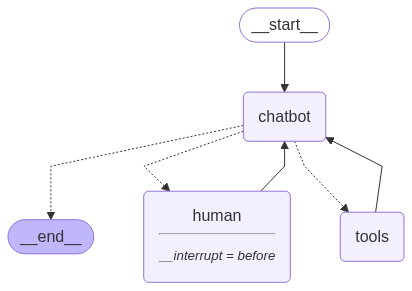

In [13]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [14]:
user_input = "I need some expert guidance for building this AI agent. Could you request assistance for me?"
config = {"configurable": {"thread_id": "1"}}
# The config is the **second positional argument** to stream() or invoke()!
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I need some expert guidance for building this AI agent. Could you request assistance for me?
================================== Ai Message ==================================
Tool Calls:
  RequestAssistance (call_bt4EujiO1iYitm1UFGIYSj0O)
 Call ID: call_bt4EujiO1iYitm1UFGIYSj0O
  Args:
    request: I need expert guidance for building an AI agent using LangGraph.


In [15]:
snapshot = graph.get_state(config)
snapshot.next

('human',)

In [16]:
ai_message = snapshot.values["messages"][-1]
human_response = (
    "We, the experts are here to help! We'd recommend you check out LangGraph to build your agent."
    " It's much more reliable and extensible than simple autonomous agents."
)
tool_message = create_response(human_response, ai_message)
graph.update_state(config, {"messages": [tool_message]})

{'configurable': {'thread_id': '1',
  'checkpoint_ns': '',
  'checkpoint_id': '1f0874a6-7af5-6232-8007-daaa666dfa9a'}}

In [17]:
graph.get_state(config).values["messages"]

[HumanMessage(content="I'm learning LangGraph. Could you do some research on it for me?", additional_kwargs={}, response_metadata={}, id='db50906c-9601-4e47-9789-b541f513ef50'),
 AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_pUjP2dwmDgcj9McmctRDqegK', 'function': {'arguments': '{"query":"LangGraph programming language"}', 'name': 'tavily_search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 19, 'prompt_tokens': 1283, 'total_tokens': 1302, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 1280}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CAnuM6kLz4K8WGf4clU1fCsUZw8Mt', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2a96f743-79f9-4284-8035-9288aa1ea30a-0', tool_calls=[{'name': 'ta

In [18]:
events = graph.stream(None, config, stream_mode="values")
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================= Tool Message =================================

We, the experts are here to help! We'd recommend you check out LangGraph to build your agent. It's much more reliable and extensible than simple autonomous agents.
================================= Tool Message =================================

We, the experts are here to help! We'd recommend you check out LangGraph to build your agent. It's much more reliable and extensible than simple autonomous agents.
================================== Ai Message ==================================

I've requested expert assistance for you to get guidance on building an AI agent with LangGraph. The experts have recommended checking out LangGraph for constructing your agent, as it is more reliable and extensible than simple autonomous agents. If you need further help or have more questions, feel free to ask!


In [19]:
user_input = (
    "Sure, please use your search tools to find something about LangGraph for me."
)
events = graph.stream(
    {"messages": [("user", user_input)]}, config, stream_mode="values"
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

Sure, please use your search tools to find something about LangGraph for me.
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_iLjkhgyfUaLw5QtL0ZNO2bzw)
 Call ID: call_iLjkhgyfUaLw5QtL0ZNO2bzw
  Args:
    query: LangGraph library
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "langgraph · PyPI", "url": "https://pypi.org/project/langgraph/0.0.25/", "content": "LangGraph is a library for building stateful, multi-actor applications with LLMs, built on top of (and intended to be used with) LangChain.\nIt extends the LangChain Expression Language with the ability to coordinate multiple chains (or actors) across multiple steps of computation in a cyclic manner.\nIt is inspired by Pregel and Apache Beam.\nThe current interface exposed is one inspired by Netw

## `109.` time travel
* https://colab.research.google.com/drive/16pumlTsseLni9DBpv5she7HDuXT9TNk6

In [5]:
from typing import Annotated, Literal

from langchain_openai import ChatOpenAI
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import AIMessage, BaseMessage, ToolMessage
from langchain_core.pydantic_v1 import BaseModel
from typing_extensions import TypedDict

from langgraph.checkpoint.sqlite import SqliteSaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]
    # This flag is new
    ask_human: bool


class RequestAssistance(BaseModel):
    """Escalate the conversation to an expert. Use this if you are unable to assist directly or if the user requires support beyond your permissions.

    To use this function, relay the user's 'request' so the expert can provide the right guidance.
    """

    request: str


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI()
# We can bind the llm to a tool definition, a pydantic model, or a json schema
llm_with_tools = llm.bind_tools(tools + [RequestAssistance])


def chatbot(state: State):
    response = llm_with_tools.invoke(state["messages"])
    ask_human = False
    if (
        response.tool_calls
        and response.tool_calls[0]["name"] == RequestAssistance.__name__
    ):
        ask_human = True
    return {"messages": [response], "ask_human": ask_human}


graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)
graph_builder.add_node("tools", ToolNode(tools=[tool]))


def create_response(response: str, ai_message: AIMessage):
    return ToolMessage(
        content=response,
        tool_call_id=ai_message.tool_calls[0]["id"],
    )


def human_node(state: State):
    new_messages = []
    if not isinstance(state["messages"][-1], ToolMessage):
        # Typically, the user will have updated the state during the interrupt.
        # If they choose not to, we will include a placeholder ToolMessage to
        # let the LLM continue.
        new_messages.append(
            create_response("No response from human.", state["messages"][-1])
        )
    return {
        # Append the new messages
        "messages": new_messages,
        # Unset the flag
        "ask_human": False,
    }


graph_builder.add_node("human", human_node)


def select_next_node(state: State) -> Literal["human", "tools", "__end__"]:
    if state["ask_human"]:
        return "human"
    # Otherwise, we can route as before
    return tools_condition(state)


graph_builder.add_conditional_edges(
    "chatbot",
    select_next_node,
    {"human": "human", "tools": "tools", "__end__": "__end__"},
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.add_edge("human", "chatbot")
graph_builder.set_entry_point("chatbot")

# memory = SqliteSaver.from_conn_string(":memory:")
import sqlite3

# memory = SqliteSaver.from_conn_string(":memory:")
# with SqliteSaver.from_conn_string(":memory:") as memory:
conn = sqlite3.connect("langgraph_memory.sqlite", check_same_thread=False)
memory = SqliteSaver(conn=conn)

graph = graph_builder.compile(
    checkpointer=memory,
    interrupt_before=["human"],
)

/usr/local/anaconda3/envs/for-genai/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3577: LangChainDeprecationWarning: As of langchain-core 0.3.0, LangChain uses pydantic v2 internally. The langchain_core.pydantic_v1 module was a compatibility shim for pydantic v1, and should no longer be used. Please update the code to import from Pydantic directly.

For example, replace imports like: `from langchain_core.pydantic_v1 import BaseModel`
with: `from pydantic import BaseModel`
or the v1 compatibility namespace if you are working in a code base that has not been fully upgraded to pydantic 2 yet. 	from pydantic.v1 import BaseModel

  exec(code_obj, self.user_global_ns, self.user_ns)
/var/folders/02/m1j4q6jj79zbjw0qtxcldpnc0000gn/T/ipykernel_3678/4275922845.py:30: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be

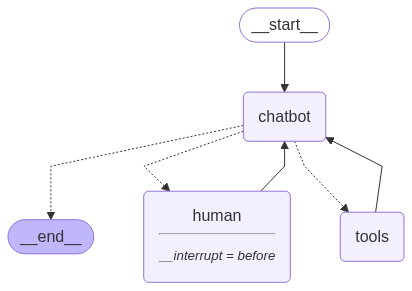

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [7]:
config = {"configurable": {"thread_id": "1"}}
events = graph.stream(
    {
        "messages": [
            ("user", "I'm learning LangGraph. Could you do some research on it for me?")
        ]
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

I'm learning LangGraph. Could you do some research on it for me?
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_5C0pPUFu7LnwkQy3DMVJsrAp)
 Call ID: call_5C0pPUFu7LnwkQy3DMVJsrAp
  Args:
    query: LangGraph programming language
  tavily_search_results_json (call_sIEHU0HCSIhVSSXSNf2eioun)
 Call ID: call_sIEHU0HCSIhVSSXSNf2eioun
  Args:
    query: LangGraph library
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "langgraph · PyPI", "url": "https://pypi.org/project/langgraph/0.0.25/", "content": "LangGraph is a library for building stateful, multi-actor applications with LLMs, built on top of (and intended to be used with) LangChain.\nIt extends the LangChain Expression Language with the ability to coordinate multiple chains (or actors) across multiple

In [8]:
events = graph.stream(
    {
        "messages": [
            ("user", "Ya that's helpful. Maybe I'll build an autonomous agent with it!")
        ]
    },
    config,
    stream_mode="values",
)
for event in events:
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================ Human Message =================================

Ya that's helpful. Maybe I'll build an autonomous agent with it!
================================== Ai Message ==================================

That's a fantastic idea! Building an autonomous agent with LangGraph can be an exciting and rewarding project. If you need any help, guidance, or have any questions while working on your autonomous agent project, feel free to ask. I'm here to support you along the way!


In [9]:
config

{'configurable': {'thread_id': '1'}}

In [10]:
len(list(graph.get_state_history(config)))

32

In [14]:
to_replay = None
for i, state in enumerate(graph.get_state_history(config)):
    # print((i, state))
    print("Num Messages: ", len(state.values["messages"]), "Next: ", state.next)
    print("-" * 80)
    if len(state.values["messages"]) == 2:
        # We are somewhat arbitrarily selecting a specific state based on the number of chat messages in the state.
        to_replay = state

Num Messages:  27 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  26 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  25 Next:  ('__start__',)
--------------------------------------------------------------------------------
Num Messages:  25 Next:  ()
--------------------------------------------------------------------------------
Num Messages:  24 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  22 Next:  ('tools',)
--------------------------------------------------------------------------------
Num Messages:  21 Next:  ('chatbot',)
--------------------------------------------------------------------------------
Num Messages:  20 Next:  ('__start__',)
--------------------------------------------------------------------------------
Num Messages:  20 Next:  ()
--------------------------------------

In [15]:
print(to_replay.next)
print(to_replay.config)

('tools',)
{'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f086d56-acc5-66d8-8001-98540fe86a2c'}}


In [16]:
# The `thread_ts` in the `to_replay.config` corresponds to a state we've persisted to our checkpointer.
for event in graph.stream(None, to_replay.config, stream_mode="values"):
    if "messages" in event:
        event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search (call_pUjP2dwmDgcj9McmctRDqegK)
 Call ID: call_pUjP2dwmDgcj9McmctRDqegK
  Args:
    query: LangGraph programming language
================================= Tool Message =================================
Name: tavily_search

Error: tavily_search is not a valid tool, try one of [tavily_search_results_json].
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_Dlpa0FavKfj9W3Ij1z738Cpr)
 Call ID: call_Dlpa0FavKfj9W3Ij1z738Cpr
  Args:
    query: LangGraph programming language
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "LangGraph: What It Is and How To Use It [Tutorial]", "url": "https://lazyprogrammer.me/langgraph/", "content": "What Programming Languages Are Supported by LangGraph?\n\nLangGraph works primarily with Python. It a

## `110.` RAGs in LangGraph
* https://colab.research.google.com/drive/15Jwew-WBLHCKA8T-AGga7afocBePlbLz
* https://docs.google.com/document/d/1b7DlLtvrVxihcO65dsBaIjUU-a6aLjdQfNHSOM2PhUM/edit?tab=t.0#bookmark=id.6msokmfck1u4
* https://arxiv.org/abs/2310.11511

```sh
pip install chromadb
```

In [17]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    chunk_size=250, chunk_overlap=0
)
doc_splits = text_splitter.split_documents(docs_list)

# Add to vectorDB
vectorstore = Chroma.from_documents(
    documents=doc_splits,
    collection_name="rag-chroma",
    embedding=OpenAIEmbeddings(),
)
retriever = vectorstore.as_retriever()

In [18]:
### Retrieval Grader
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_openai import ChatOpenAI


# Data model
class GradeDocuments(BaseModel):
    """Binary score for relevance check on retrieved documents."""

    binary_score: str = Field(
        description="Documents are relevant to the question, 'yes' or 'no'"
    )


# LLM with function call
llm = ChatOpenAI(model="gpt-4o", temperature=0)
structured_llm_grader = llm.with_structured_output(GradeDocuments)

# Prompt
system = """You are a grader assessing relevance of a retrieved document to a user question. \n
    It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question."""

grade_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Retrieved document: \n\n {document} \n\n User question: {question}"),
    ]
)

retrieval_grader = grade_prompt | structured_llm_grader
question = "agent memory"
docs = retriever.invoke(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))

/usr/local/anaconda3/envs/for-genai/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1893: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


binary_score='yes'


In [19]:
### Generate

from langchain import hub
from langchain_core.output_parsers import StrOutputParser

# Prompt
prompt = hub.pull("rlm/rag-prompt")

# LLM
llm = ChatOpenAI(model_name="gpt-4o", temperature=0)


# Post-processing
def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)


# Chain
rag_chain = prompt | llm | StrOutputParser()

# Run
generation = rag_chain.invoke({"context": docs, "question": question})
print(generation)

In LLM-powered autonomous agents, memory is divided into short-term and long-term components. Short-term memory involves in-context learning, while long-term memory allows the agent to retain and recall information over extended periods, often using an external vector store for fast retrieval. This memory system enables agents to learn from past experiences and improve future actions.


In [20]:
### Hallucination Grader


# Data model
class GradeHallucinations(BaseModel):
    """Binary score for hallucination present in generation answer."""

    binary_score: str = Field(
        description="Answer is grounded in the facts, 'yes' or 'no'"
    )


# LLM with function call
llm = ChatOpenAI(model="gpt-4o", temperature=0)
structured_llm_grader = llm.with_structured_output(GradeHallucinations)

# Prompt
system = """You are a grader assessing whether an LLM generation is grounded in / supported by a set of retrieved facts. \n
     Give a binary score 'yes' or 'no'. 'Yes' means that the answer is grounded in / supported by the set of facts."""
hallucination_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "Set of facts: \n\n {documents} \n\n LLM generation: {generation}"),
    ]
)

hallucination_grader = hallucination_prompt | structured_llm_grader
hallucination_grader.invoke({"documents": docs, "generation": generation})

/usr/local/anaconda3/envs/for-genai/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1893: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


GradeHallucinations(binary_score='yes')

In [21]:
### Answer Grader


# Data model
class GradeAnswer(BaseModel):
    """Binary score to assess answer addresses question."""

    binary_score: str = Field(
        description="Answer addresses the question, 'yes' or 'no'"
    )


# LLM with function call
llm = ChatOpenAI(model="gpt-4o", temperature=0)
structured_llm_grader = llm.with_structured_output(GradeAnswer)

# Prompt
system = """You are a grader assessing whether an answer addresses / resolves a question \n
     Give a binary score 'yes' or 'no'. Yes' means that the answer resolves the question."""
answer_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "User question: \n\n {question} \n\n LLM generation: {generation}"),
    ]
)

answer_grader = answer_prompt | structured_llm_grader
answer_grader.invoke({"question": question, "generation": generation})

/usr/local/anaconda3/envs/for-genai/lib/python3.12/site-packages/langchain_openai/chat_models/base.py:1893: UserWarning: Received a Pydantic BaseModel V1 schema. This is not supported by method="json_schema". Please use method="function_calling" or specify schema via JSON Schema or Pydantic V2 BaseModel. Overriding to method="function_calling".
  warnings.warn(


GradeAnswer(binary_score='no')

In [22]:
### Question Re-writer

# LLM
llm = ChatOpenAI(model="gpt-4o", temperature=0)

# Prompt
system = """You a question re-writer that converts an input question to a better version that is optimized \n
     for vectorstore retrieval. Look at the input and try to reason about the underlying semantic intent / meaning."""
re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)

question_rewriter = re_write_prompt | llm | StrOutputParser()
question_rewriter.invoke({"question": question})

'What are the key functions and benefits of agent memory in artificial intelligence systems?'

In [23]:
from typing import List
from typing_extensions import TypedDict


class GraphState(TypedDict):
    """
    Represents the state of our graph.

    Attributes:
        question: question
        generation: LLM generation
        documents: list of documents
    """

    question: str
    generation: str
    documents: List[str]

In [24]:
### Nodes


def retrieve(state):
    """
    Retrieve documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---RETRIEVE---")
    question = state["question"]

    # Retrieval
    documents = retriever.invoke(question)
    return {"documents": documents, "question": question}


def generate(state):
    """
    Generate answer

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state["question"]
    documents = state["documents"]

    # RAG generation
    generation = rag_chain.invoke({"context": documents, "question": question})
    return {"documents": documents, "question": question, "generation": generation}


def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates documents key with only filtered relevant documents
    """

    print("---CHECK DOCUMENT RELEVANCE TO QUESTION---")
    question = state["question"]
    documents = state["documents"]

    # Score each doc
    filtered_docs = []
    for d in documents:
        score = retrieval_grader.invoke(
            {"question": question, "document": d.page_content}
        )
        grade = score.binary_score
        if grade == "yes":
            print("---GRADE: DOCUMENT RELEVANT---")
            filtered_docs.append(d)
        else:
            print("---GRADE: DOCUMENT NOT RELEVANT---")
            continue
    return {"documents": filtered_docs, "question": question}


def transform_query(state):
    """
    Transform the query to produce a better question.

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Updates question key with a re-phrased question
    """

    print("---TRANSFORM QUERY---")
    question = state["question"]
    documents = state["documents"]

    # Re-write question
    better_question = question_rewriter.invoke({"question": question})
    return {"documents": documents, "question": better_question}


### Edges


def decide_to_generate(state):
    """
    Determines whether to generate an answer, or re-generate a question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    state["question"]
    filtered_documents = state["documents"]

    if not filtered_documents:
        # All documents have been filtered check_relevance
        # We will re-generate a new query
        print(
            "---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, TRANSFORM QUERY---"
        )
        return "transform_query"
    else:
        # We have relevant documents, so generate answer
        print("---DECISION: GENERATE---")
        return "generate"


def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """

    print("---CHECK HALLUCINATIONS---")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    score = hallucination_grader.invoke(
        {"documents": documents, "generation": generation}
    )
    grade = score.binary_score

    # Check hallucination
    if grade == "yes":
        print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
        # Check question-answering
        print("---GRADE GENERATION vs QUESTION---")
        score = answer_grader.invoke({"question": question, "generation": generation})
        grade = score.binary_score
        if grade == "yes":
            print("---DECISION: GENERATION ADDRESSES QUESTION---")
            return "useful"
        else:
            print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
            return "not useful"
    else:
        print("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "not supported"

In [25]:
from langgraph.graph import END, StateGraph

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("retrieve", retrieve)  # retrieve
workflow.add_node("grade_documents", grade_documents)  # grade documents
workflow.add_node("generate", generate)  # generatae
workflow.add_node("transform_query", transform_query)  # transform_query

# Build graph
workflow.set_entry_point("retrieve")
workflow.add_edge("retrieve", "grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "transform_query": "transform_query",
        "generate": "generate",
    },
)
workflow.add_edge("transform_query", "retrieve")
workflow.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "not supported": "generate",
        "useful": END,
        "not useful": "transform_query",
    },
)

# Compile
app = workflow.compile()

In [27]:
help(pprint)

Help on function pprint in module pprint:

pprint(object, stream=None, indent=1, width=80, depth=None, *, compact=False, sort_dicts=True, underscore_numbers=False)
    Pretty-print a Python object to a stream [default is sys.stdout].



In [26]:
from pprint import pprint

# Run
inputs = {"question": "Explain how the different types of agent memory work?"}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value["generation"])

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT NOT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---
"Node 'generate':"
'\n---\n'
('In LLM-powered autonomous agents, short-term memory involves in-context '
 'learning, where the model uses prompt engineering to learn and adapt '
 'quickly. Long-term memory allows the agent to retain and recall information '
 'over extended periods by leveraging an external vector store for fast '
 'retrieval. This combination enables the agent to handle complex tasks and '
 'improve over time by learning from past experiences.')


In [28]:
inputs = {"question": "Explain how chain of thought prompting works?"}
for output in app.stream(inputs):
    for key, value in output.items():
        # Node
        pprint(f"Node '{key}':")
        # Optional: print full state at each node
        # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
    pprint("\n---\n")

# Final generation
pprint(value["generation"])

---RETRIEVE---
"Node 'retrieve':"
'\n---\n'
---CHECK DOCUMENT RELEVANCE TO QUESTION---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
"Node 'grade_documents':"
'\n---\n'
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---
"Node 'generate':"
'\n---\n'
('Chain of thought prompting works by instructing a language model to "think '
 'step by step," breaking down complex tasks into smaller, manageable steps. '
 "This approach enhances the model's performance on complex tasks by utilizing "
 "more test-time computation and providing an interpretation of the model's "
 'reasoning process. It involves prompting the model with high-quality '
 'reasoning chains, either manually written or model-generated, to guide its '
 'problem-solving approac